<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#기본-데이터-포인트-플롯화" data-toc-modified-id="기본-데이터-포인트-플롯화-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>기본 데이터 포인트 플롯화</a></span></li><li><span><a href="#선형회귀-기본-함수-만들기" data-toc-modified-id="선형회귀-기본-함수-만들기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>선형회귀 기본 함수 만들기</a></span></li><li><span><a href="#선형회귀-기본-함수-시각화-(그림-1-5)" data-toc-modified-id="선형회귀-기본-함수-시각화-(그림-1-5)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>선형회귀 기본 함수 시각화 (그림 1-5)</a></span></li><li><span><a href="#경사도벡터(gradient)를-활용하여-최적의-선을-찾아가는-과정-(그림-1-8)" data-toc-modified-id="경사도벡터(gradient)를-활용하여-최적의-선을-찾아가는-과정-(그림-1-8)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>경사도벡터(gradient)를 활용하여 최적의 선을 찾아가는 과정 (그림 1-8)</a></span></li><li><span><a href="#교재-코드" data-toc-modified-id="교재-코드-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>교재 코드</a></span><ul class="toc-item"><li><span><a href="#그림-1-4" data-toc-modified-id="그림-1-4-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>그림 1-4</a></span></li><li><span><a href="#머신-러닝과-more_clever()-비교" data-toc-modified-id="머신-러닝과-more_clever()-비교-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>머신 러닝과 more_clever() 비교</a></span></li><li><span><a href="#그림-1-5" data-toc-modified-id="그림-1-5-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>그림 1-5</a></span></li><li><span><a href="#그림-1-7" data-toc-modified-id="그림-1-7-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>그림 1-7</a></span></li><li><span><a href="#그림-1-8" data-toc-modified-id="그림-1-8-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>그림 1-8</a></span></li></ul></li></ul></div>

### 기본 데이터 포인트 플롯화
p.4

In [1]:
"""교재"""
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 컬러로 출력하고 싶으면 True로 수정
g_color = False

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [2]:
D1 = np.array([[1.0, 1.2, 3, 4, 5, 6], [1.7, 3, 2.3, 5.3, 3.8, 5.5]])
D2 = np.array([[-0.6, 1.0, 1.2, 3, 4, 5, 6], [2.9, 1.7, 3, 2.3, 5.3, 3.8, 5.5]])

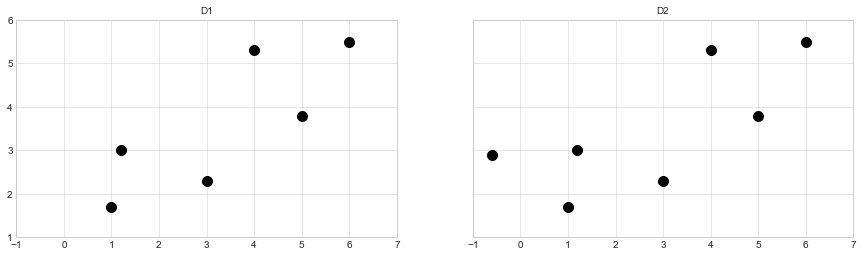

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True)
fig.set_size_inches((15, 4))

ax1.plot(D1[0], D1[1], 'ko', markersize = 10)
ax1.set_xlim([-1, 7])
ax1.set_ylim([1, 6])
ax1.set_title('D1', fontsize = 10)

ax2.plot(D2[0], D2[1], 'ko', markersize = 10)
ax2.set_xlim([-1, 7])
ax2.set_ylim([1, 6])
ax2.set_title('D2', fontsize = 10)

plt.show()

### 선형회귀 기본 함수 만들기

p.5

$h = ax +b \times 1$ 는 다음과 같다. $ h(x, \mathbf{w}) = w_1 x + w_0$

- `machin_learning`은 선형회귀 알고리즘을 사용하여 최적의 직선을 게산한다. 1열에는 모두 숫자 1을 가지고 2열에는 데이터의 x좌표를 가지는 array X를 만든다. array X는 2차원이고, array의 모양은 N행(데이터 개수) 2열이 된다.  
y는 (N, )인 1차원 array이다.  
앞으로 배울 normal equation을 풀어서 직선의 계수를 구한다. 

- `more_clever`는 첫점과 끝점을 잇는 방식으로 직선을 계산한다. 다음과 같은 공식을 이용한다.  
$$ y-y_1 = \frac {y_2 - y_1} {x_2 -x_1} (x - x_1)$$  

- f()는 입력 x와 계수 $\mathbf w$를 가지고 출력 y를 계산하는 함수이다. a가 w[1], b가 w[0]이 되는 식.

In [4]:
def machine_learning(D):
    N = D.shape[1]
    X = np.c_[np.ones(N), D[0]]
    y = D[1]
    
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

In [5]:
def more_clever(D):
    first, last = D[:, 0], D[:, -1]
    w1 =(last[1]-first[1] / last[0]-first[0])
    w0 = -w1*first[0] + first[1]
    return (w0, w1)

In [6]:
def f(x, w):
    return w[1] * x + w[0]

In [7]:
"""교재"""
# D1에 대해서 w[1]*x + w[0]에서 w[0], w[1]을 구합니다. 
w_ml_d1 = machine_learning(D1)
w_mc_d1 = more_clever(D1)

# D2에 대해서 w[1]*x + w[0]에서 w[0], w[1]을 구합니다. 
w_ml_d2 = machine_learning(D2)
w_mc_d2 = more_clever(D2)

print(w_ml_d1)

[1.5108 0.6206]


### 선형회귀 기본 함수 시각화 (그림 1-5)
p.6


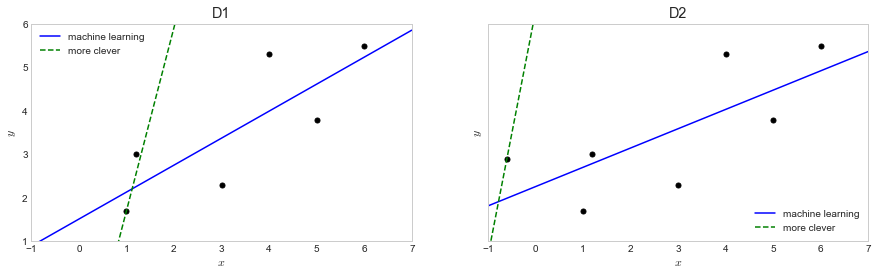

In [8]:
x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True)
fig.set_size_inches((15, 4))

ax1.xaxis.set_tick_params(labelsize = 10)
ax1.yaxis.set_tick_params(labelsize = 10)
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=10)
ax2.yaxis.set_tick_params(labelsize=10)
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('$y$', fontsize=12)
ax2.grid(False)

ax1.plot(D1[0], D1[1], 'ko', markersize = 5, mfc = 'k')
ax1.plot(x, f(x, w_ml_d1), c = 'b', lw= 1.5, label='machine learning')
ax1.plot(x, f(x, w_mc_d1), '--', c = 'g', lw = 1.5, label='more clever')
ax1.set_xlim([-1, 7])
ax1.set_ylim([1, 6])
ax1.set_title('D1')
ax1.legend(fontsize = 10)

ax2.plot(D2[0], D2[1], 'ko', markersize = 5, mfc = 'k')
ax2.plot(x, f(x, w_ml_d2), c = 'b', lw = 1.5, label='machine learning')
ax2.plot(x, f(x, w_mc_d2), '--', c = 'g', lw = 1.5, label='more clever')
ax2.set_xlim([-1, 7])
ax2.set_ylim([1, 6])
ax2.set_title('D2')
ax2.legend(fontsize = 10)

plt.show()

### 경사도벡터(gradient)를 활용하여 최적의 선을 찾아가는 과정 (그림 1-8)
p.13

In [9]:
D1 = np.array([[1.0, 1.2, 3, 4, 5, 6], [1.7, 3, 2.3, 5.3, 3.8, 5.5]])

num_iters = 150
eta = 0.02

np.random.seed(2)
w = np.random.randn(2)
N = D1.shape[1]

ws, L = [], []

X = np.c_[np.ones(N), D1[0]]
y = D1[1]

for i in range(num_iters):
    # grad L
    c = np.dot(X.T, np.dot(X, w) - y)
    # grad L을 이용하여 w를 수정
    w -= eta *c
    # w가 변화되는 과정 저장
    ws.append(w)
    # Loss 계산
    L.append( ((np.dot(X, w)-y)**2).sum() / 2 )

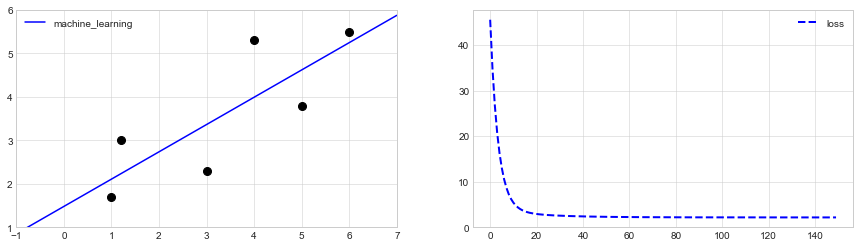

In [10]:
# 시각화

X = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((15, 4))

ax1.plot(D1[0], D1[1], 'ko', markersize = 8)
ax1.plot(x, f(x, w), c = 'b', lw = 1.5, label = 'machine_learning')
ax1.set_xlim([-1, 7])
ax1.set_ylim([1, 6])
ax1.legend(fontsize = 10)

ax2.plot(L[:150], '--', c = 'b', label = 'loss')
ax2.legend(fontsize = 10)

plt.show()

### 교재 코드

In [ ]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 컬러로 출력하고 싶으면 True로 수정
g_color = False

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [ ]:
# 데이터 파일 사용을 위한 github repo 복사
# !주의! 
# 구글 colab 환경에서 실행하는 경우만 실행하세요.
# 로컬환경에서는 실행하지 마세요.
!git clone -l -s https://github.com/metamath1/noviceml.git noviceml

In [ ]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

# 로컬 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
# https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html
# 아래 코드의 주석 제거 후 경로를 유저 컴퓨터의 폰트 파일 경로로 수정하세요.
# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# fontprop = mfm.FontProperties(fname=path, size=18)

In [ ]:
# 데이터를 두벌 마련합니다.
# D1은 앞서 예제로 들었던 최초 점 6개짜리 데이터입니다.
# D2는 D1에 제일 왼쪽점 하나가 더 추가된 데이터입니다.
D1 = np.array([[1.0, 1.2, 3, 4, 5, 6], [1.7, 3, 2.3, 5.3, 3.8, 5.5]])
D2 = np.array([[-0.6, 1.0, 1.2, 3, 4, 5, 6], [2.9, 1.7, 3, 2.3, 5.3, 3.8, 5.5]])

#### 그림 1-4


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.set_title('D1', fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.set_title('D2', fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap1/fig1-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-4.pdf", format='pdf', bbox_inches='tight')

plt.show()

#### 머신 러닝과 more_clever() 비교

In [ ]:
def machine_learning(D):
    """
    선형회귀 알고리즘을 사용하여 최적의 직선을 계산합니다.
    D : (2,N)의 어레이로 1행에는 데이터의 x좌표
        2행에는 데이터의 y좌표가 저장 되어 있습니다.
    """
    # 데이터의 개수를 N에 할당합니다.
    N = D.shape[1] 
    
    # 1열에 1, 2열에 데이터의 x좌표를 가지는 행렬을 만듭니다.
    # X: (N,2), y: (N,)
    X = np.c_[np.ones(N), D[0]]
    y = D[1]
    
    # 앞으로 배울 정규방정식을 풀어서 직선의 계수를 구합니다.
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

def more_clever(D):
    """
    첫점과 끝점을 연결하는 직선을 계산합니다.
    D : (2,N)의 어레이로 1행에는 데이터의 x좌표
        2행에는 데이터의 y좌표가 저장 되어 있습니다.
    """
    first, last = D[:,0], D[:,-1]
    
    w1 = (last[1]-first[1]) / (last[0]-first[0])
    w0 = -w1*first[0] + first[1]
    
    return (w0, w1)
    
def f(x, w):
    """
    주어진 w를 사용하여 직선 f(x) = w[1]*x + w[0]의 값을 계산합니다.
    """
    return w[1]*x + w[0]

In [ ]:
# D1에 대해서 w[1]*x + w[0]에서 w[0], w[1]을 구합니다. 
w_ml_d1 = machine_learning(D1)
w_mc_d1 = more_clever(D1)

# D2에 대해서 w[1]*x + w[0]에서 w[0], w[1]을 구합니다. 
w_ml_d2 = machine_learning(D2)
w_mc_d2 = more_clever(D2)

print(w_ml_d1)

#### 그림 1-5

In [ ]:
x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.plot(x, f(x, w_ml_d1), c='k', lw=2, label='machine learning')
ax1.plot(x, f(x, w_mc_d1), '--', c='k', lw=2, label='more clever')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.plot(x, f(x, w_ml_d2), c='k', lw=2, label='machine learning')
ax2.plot(x, f(x, w_mc_d2), '--', c='k', lw=2, label='more clever')
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.legend(fontsize=18)

# 그림이 저장될 로컬 폴더를 적당히 설정후 실행하세요.
if file_print == True :
    fig.savefig("imgs/chap1/fig1-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-5.pdf", format='pdf', bbox_inches='tight')

plt.show()

#### 그림 1-7

In [ ]:
W = np.array([[1.0, 0.3],[3.3, 0.42],[3.0, 0.2],[1.5, 0.6]])

fig, ax = plt.subplots(2, 2, sharex='all', sharey='all')
fig.set_size_inches((16,13))

for j in range(W.shape[0]):
    w0, w1 = W[j,0], W[j,1]
    y=f(D1[0], [w0, w1])
    loss = 0.0
    
    ax[j // 2, j % 2].xaxis.set_tick_params(labelsize=18)
    ax[j // 2, j % 2].yaxis.set_tick_params(labelsize=18)
    ax[j // 2, j % 2].set_xlabel('$x$', fontsize=25)
    ax[j // 2, j % 2].set_ylabel('$y$', fontsize=25)
    ax[j // 2, j % 2].plot(x, f(x, [w0,w1]), c='k', lw=2, label='machine learning')
    ax[j // 2, j % 2].grid(False)
    
    for i in range(len(y)):
        loss+=np.abs(D1[1,i]-y[i])
        ax[j // 2, j % 2].plot([D1[0,i], D1[0,i]],[D1[1,i], y[i]],'k--')
        
    ax[j // 2, j % 2].plot(D1[0], D1[1], 'ko', markersize=10)
    ax[j // 2, j % 2].set_xlim([-1,7])
    ax[j // 2, j % 2].set_ylim([1,6])
    ax[j // 2, j % 2].set_title('D1, loss:{:f}'.format(loss), fontsize=18)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in ax.flat:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.1, wspace=0.05)

# 그림이 저장될 로컬 폴더를 적당히 설정후 실행하세요.
if file_print == True :
    fig.savefig("imgs/chap1/fig1-7.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-7.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

#### 그림 1-8

In [ ]:
num_iters = 150
alpha = 0.02

np.random.seed(2)
w = np.random.randn(2)
N = D1.shape[1] 

ws, L = [], []

# 1열에 1, 2열에 데이터의 x좌표를 가지는 행렬을 만듭니다.
# X: (N,2), y: (N,)
X = np.c_[np.ones(N), D1[0]]
y = D1[1]

# 여기서 우리의 경험 E를 반복하면서 태스크 T를 개선해 나간다.
for i in range(num_iters) :
    # grad L
    c = (1/N) * np.dot(X.T, np.dot(X, w) - y) 
    # 안전장치 grad L을 이용해서 w를 수정한다.
    w -= alpha * c 
    # w가 변화되는 과정을 저장해둔다.
    ws.append(w)
    
    # 손실을 계산한다.
    L.append( ((np.dot(X, w) - y)**2).sum()/(2*N) )

x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)
    
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)
    
ax1.plot(D1[0], D1[1], 'ko', markersize=8)
ax1.plot(x, f(x, w), c='k', lw=2, label='machine learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(L[:50], '--', c='k', label='loss')
ax2.legend(fontsize=18)

# 그림이 저장될 로컬 폴더를 적당히 설정후 실행하세요.
if file_print == True :
    fig.savefig("imgs/chap1/fig1-8.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap1/fig1-8.pdf", format='pdf', bbox_inches='tight')
    
plt.show()